## Introduction
This project aims to analyze and build a machine learning model using the Social Network Ads dataset. We'll go through the stages of data preprocessing, exploratory data analysis (EDA), and model building to predict outcomes.

### 1. Importing Libraries
We start by importing the necessary libraries for data manipulation, visualization, and machine learning.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Loading the Dataset
We load the dataset using pandas and display the first few rows to understand its structure.

In [24]:
df = pd.read_csv(r"C:\5th semester\Machine Learning\Social_Network_Ads.csv")

In [25]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 3. Data Preprocessing
Here, we clean the data and perform necessary preprocessing steps like handling missing values, encoding categorical variables, and feature scaling.

In [26]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [27]:
df.shape

(400, 5)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [29]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
gender_values = pd.get_dummies(df['Gender'], drop_first=True)

In [32]:
df['gender_dummy'] = gender_values

### 4. Exploratory Data Analysis (EDA)
We visualize the dataset to understand trends, distributions, and relationships between features.

In [33]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [34]:
purchased_values = df.Purchased.value_counts()

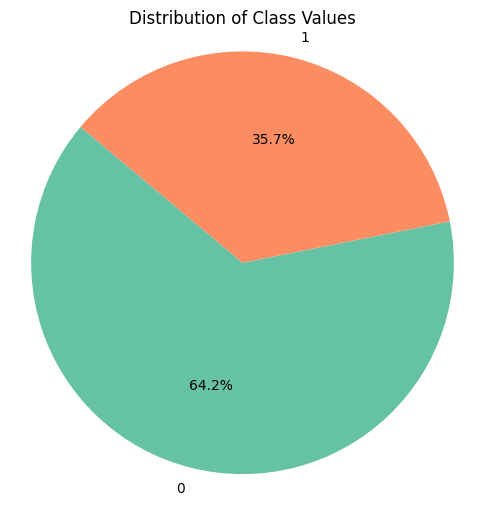

In [35]:
plt.figure(figsize=(6, 6))
plt.pie(purchased_values, labels=purchased_values.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(gender_values)))
plt.title('Distribution of Class Values')
plt.axis('equal')  
plt.show()


<Axes: xlabel='Purchased', ylabel='Count'>

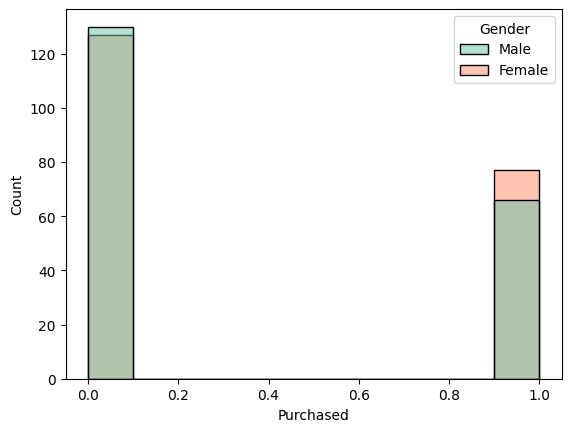

In [36]:
sns.histplot(data=df, x='Purchased', hue='Gender', palette='Set2')


In [37]:
purchased_data = df[df['Purchased'] == 1]
not_purchased_data = df[df['Purchased'] == 0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_9024\285845626.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='EstimatedSalary', data=purchased_data, ax=ax1, palette='Set1')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9024\285845626.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='EstimatedSalary', data=not_purchased_data, ax=ax2, palette='Reds')


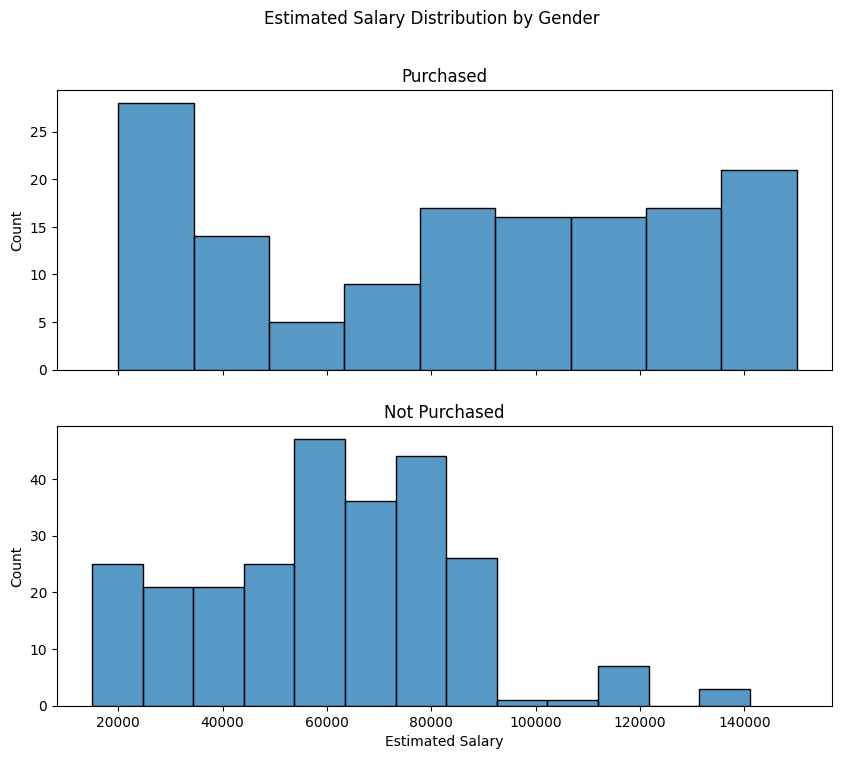

In [38]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
f.suptitle('Estimated Salary Distribution by Gender')

sns.histplot(x='EstimatedSalary', data=purchased_data, ax=ax1, palette='Set1')
ax1.set_title('Purchased')
ax1.set_xlabel('Estimated Salary')


sns.histplot(x='EstimatedSalary', data=not_purchased_data, ax=ax2, palette='Reds')
ax2.set_title('Not Purchased')
ax2.set_xlabel('Estimated Salary')

plt.show()

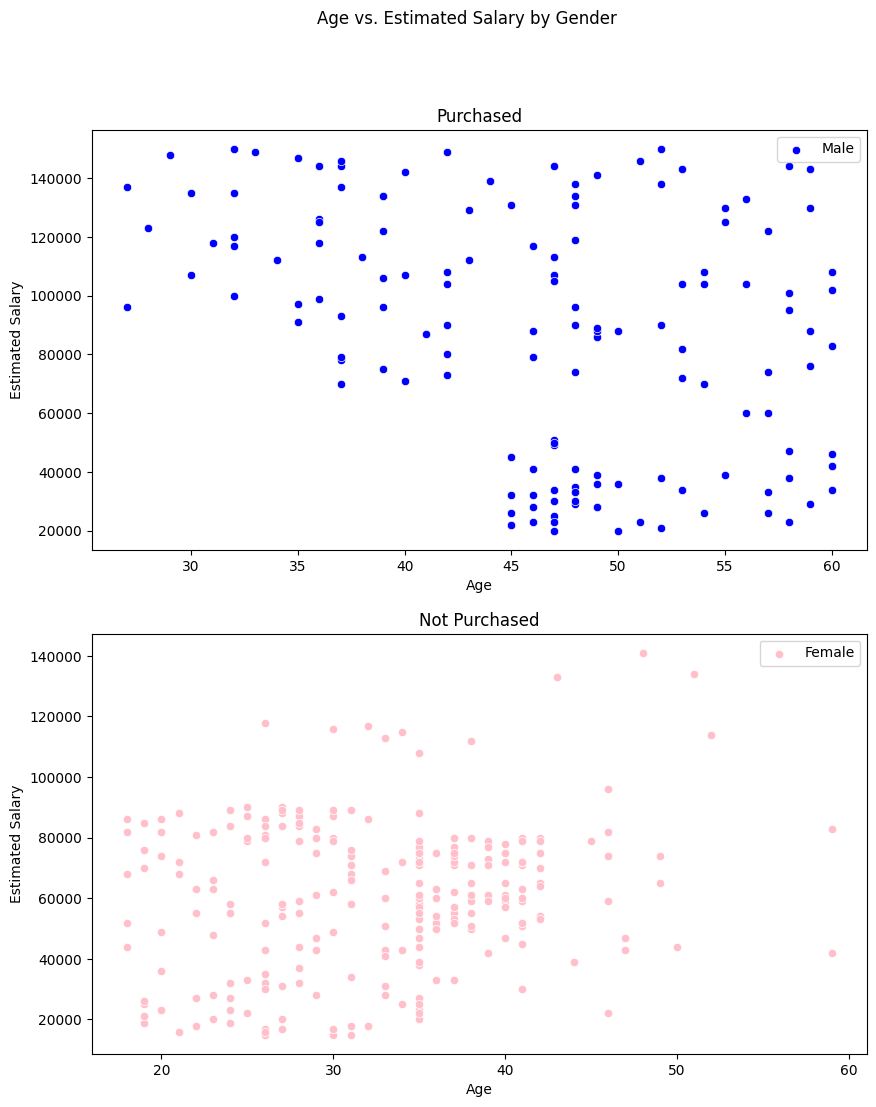

In [39]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
f.suptitle('Age vs. Estimated Salary by Gender')

sns.scatterplot(x='Age', y='EstimatedSalary', data=purchased_data, ax=ax1, color='blue', label='Male')
ax1.set_title('Purchased')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

sns.scatterplot(x='Age', y='EstimatedSalary', data=not_purchased_data, ax=ax2, color='pink', label='Female')
ax2.set_title('Not Purchased')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')

plt.show()

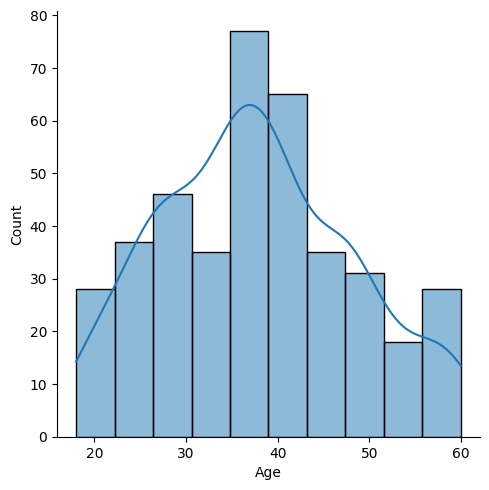

In [40]:
sns.displot(df['Age'], kde = True)
plt.show()

<Axes: >

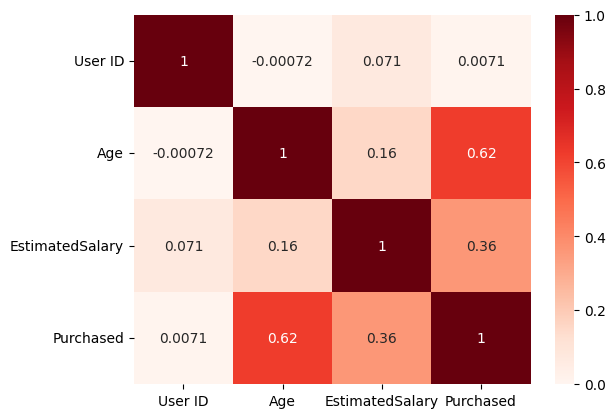

In [41]:
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')

In [42]:
x = df[['Age', 'EstimatedSalary', 'gender_dummy']]
y = df['Purchased']

### 5. Splitting the Data
We split the dataset into training and testing sets to evaluate model performance.

In [43]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.75, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 3)
(100, 3)
(300,)
(100,)


### 6. Model Building
We implement a machine learning model i.e Logistic Regression to predict the target variable.

In [44]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred_train =logit.predict(x_train)
y_pred_test=logit.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### 7. Model Evaluation
We evaluate the model performance using metrics like accuracy, confusion matrix, precision, and recall.

In [47]:
print(confusion_matrix(y_train,y_pred_train))
print('--------')
print(confusion_matrix(y_test,y_pred_test))

[[178  14]
 [ 27  81]]
--------
[[57  8]
 [10 25]]


In [48]:
print(classification_report(y_train,y_pred_train))
print('--------')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       192
           1       0.85      0.75      0.80       108

    accuracy                           0.86       300
   macro avg       0.86      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300

--------
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        65
           1       0.76      0.71      0.74        35

    accuracy                           0.82       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.82      0.82      0.82       100



In [49]:
print(accuracy_score(y_train,y_pred_train))
print('--------')
print(accuracy_score(y_test,y_pred_test))

0.8633333333333333
--------
0.82


<Figure size 600x500 with 0 Axes>

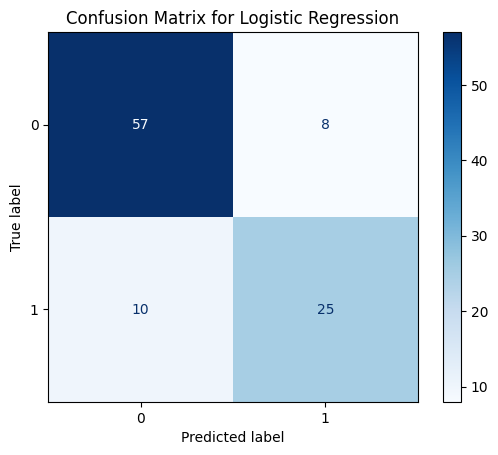

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


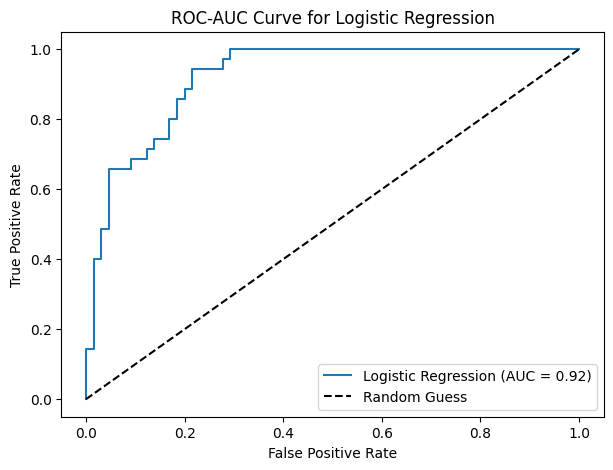

In [53]:
from sklearn.metrics import roc_curve, auc
y_probs = logit.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Logistic Regression")
plt.legend()
plt.show()
